# Sandbox time
Today we are trying to see if we can get things other than 2D box from the car racing

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CarRacing-v3", render_mode="human", continuous=False, domain_randomize=True)

obs, _ = env.reset()
done = False

counter = 0
while not done or counter < 1000:
    action = 3
    obs, reward, done, truncated, info = env.step(action)
    # print(env.observation_space)
    env.render()
    # print(obs)
    # print(env.action_space)
    if info != {}:
        print(info)
        break
    counter+=1


env.close()




{'lap_finished': False}


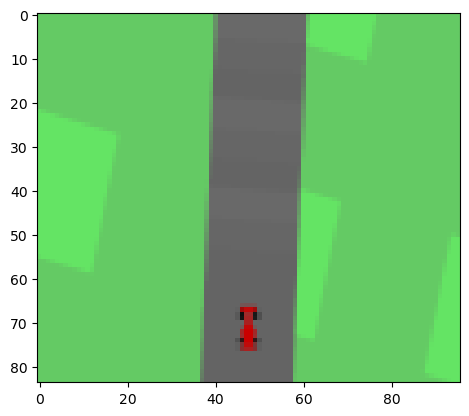

(84, 96, 3)


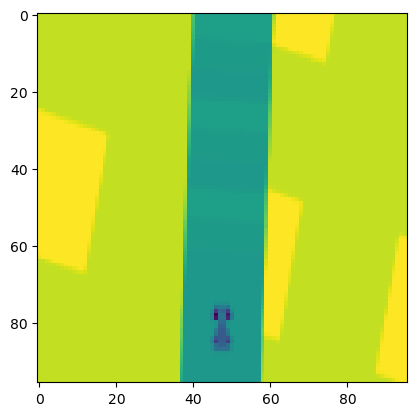

(96, 96)


In [3]:
# we will be testing to see how the crop will look like
import cv2
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym

CROP_HEIGHT_PERCENTAGE = 0.12


env = gym.make("CarRacing-v3", continuous=False)

obs, _ = env.reset()
done = False

for i in range(50):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)


observedPixels = obs[:int(obs.shape[0] * (1-CROP_HEIGHT_PERCENTAGE)), :, :]

# we will display the observed pixels
plt.imshow(observedPixels)
plt.show()
# we will print the shape of the observed pixels
print(observedPixels.shape)
# lets gray scale the image
def preprocess(image):
    image = image[:int(image.shape[0] * (1-CROP_HEIGHT_PERCENTAGE)), :, :]
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (96, 96))
    image = image / 255.0
    return image

preprocessedObs = preprocess(obs)
plt.imshow(preprocessedObs)
plt.show()
print(preprocessedObs.shape)

